# Analyse events timing


In [46]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors.kde import KernelDensity

In [2]:
dir_in = './data/'

In [3]:
# Load train data
train = pd.read_csv(os.path.join(dir_in,'gender_age_train.csv'))
groups = train.group.unique()
groups

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [4]:
# Load event data
events = pd.read_csv(os.path.join(dir_in,'events.csv'))
events = events.merge(train, on='device_id', how='inner')
events.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,M,46,M39+
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+


In [5]:
events['timestamp'] = pd.to_datetime(events['timestamp'])
events['timestamp_h'] = events['timestamp'].dt.hour
events['timestamp_d'] = events['timestamp'].dt.day

In [6]:
events['timestamp_d'][events['timestamp_d']==30]=0

/Users/joostbloom/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
# Load app event data
app_events = pd.read_csv(os.path.join(dir_in,'app_events.csv'))
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [8]:
# Get number of installed apps per hour
app_events = app_events.groupby('event_id')['is_installed','is_active'].sum().reset_index()
app_events.head()

,event_id,is_installed,is_active
0,2,19,6
1,6,38,15
2,7,40,13
3,9,35,7
4,16,31,1


In [9]:
events = events.merge(app_events, on='event_id', how='inner')
events.head(10)

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,timestamp_h,timestamp_d,is_installed,is_active
0,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+,9,6,13,13
1,70894,29182687948017175,2016-05-06 01:14:46,121.38,31.24,M,46,M39+,1,6,15,15
2,184478,29182687948017175,2016-05-05 19:14:09,0.00,0.00,M,46,M39+,19,5,14,14
3,191673,29182687948017175,2016-05-01 05:24:36,121.38,31.24,M,46,M39+,5,1,9,9
4,217601,29182687948017175,2016-05-03 06:55:14,0.00,0.00,M,46,M39+,6,3,14,14
5,273615,29182687948017175,2016-05-02 09:31:50,121.38,31.24,M,46,M39+,9,2,15,15
6,292765,29182687948017175,2016-05-06 00:09:45,121.38,31.24,M,46,M39+,0,6,43,15
7,296013,29182687948017175,2016-05-01 06:12:21,121.38,31.24,M,46,M39+,6,1,11,11
8,337996,29182687948017175,2016-05-03 02:45:18,121.38,31.24,M,46,M39+,2,3,15,15
9,339549,29182687948017175,2016-05-06 05:34:04,121.38,31.24,M,46,M39+,5,6,15,15


In [10]:
events['timestamp_d'].unique()

array([6, 5, 1, 3, 2, 7, 4, 0, 8])

In [83]:
events['timestamp'] = 100 * events['timestamp_d'] + events['timestamp_h']
events['timestamp_le'] = LabelEncoder().fit_transform(events['timestamp'])

In [84]:
events['timestamp_le'].max(), events['timestamp_le'].min()

(169, 0)

In [14]:
events['timestamp'].unique()

array([609, 601, 519, 105, 306, 209, 600, 106, 302, 605, 520, 109, 118,
       607, 506, 213, 521, 323, 101, 606, 706, 718, 720, 114, 715, 215,
       507, 110, 319, 322, 722, 200, 204, 207, 712, 400, 307, 708, 403,
       402, 100, 419, 107, 406, 300, 214, 219, 103, 208, 217, 603, 710,
       619, 621, 423, 707, 604, 111, 401, 320, 522, 223, 602, 516, 618,
       102, 104, 405, 108, 203, 620, 117, 404, 212, 517, 311, 221, 218,
       611, 116, 119, 308, 713, 113, 120, 415, 510, 719, 623, 501, 310,
       414, 416, 122, 502, 316, 220, 315, 617, 309, 410, 407, 121, 222,
       115, 112, 622, 508, 417, 318, 413, 411, 509, 515, 512, 317, 313,
       511, 518, 714, 608, 701, 711, 700, 717, 321, 513, 702, 210, 211,
       709, 409, 312, 314, 216, 301, 500, 613, 723, 408, 123, 615, 412,
       201, 514, 523, 610, 421, 420, 422, 612, 304, 504, 418, 616, 206,
       614, 503, 716, 303, 305, 703, 721, 505, 202, 205, 704, 705,  23, 800])

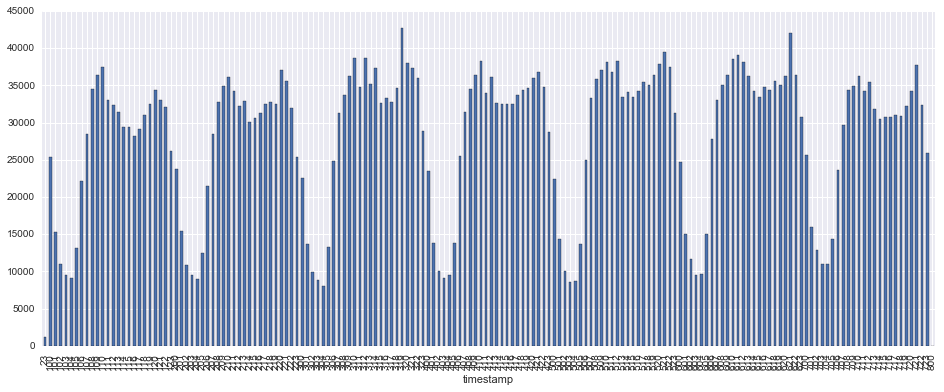

In [15]:
events.groupby('timestamp').is_active.sum().plot(kind='bar', figsize=(16,6))

In [18]:
events_per_group = events.groupby(['group','timestamp']).is_active.sum().unstack('group')

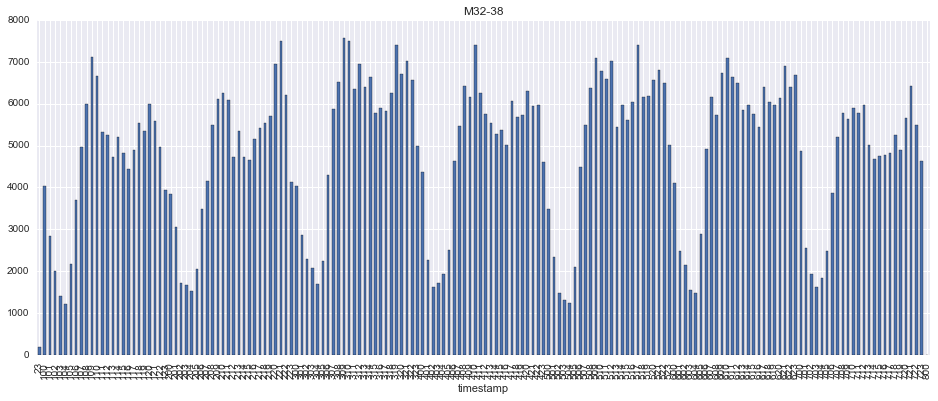

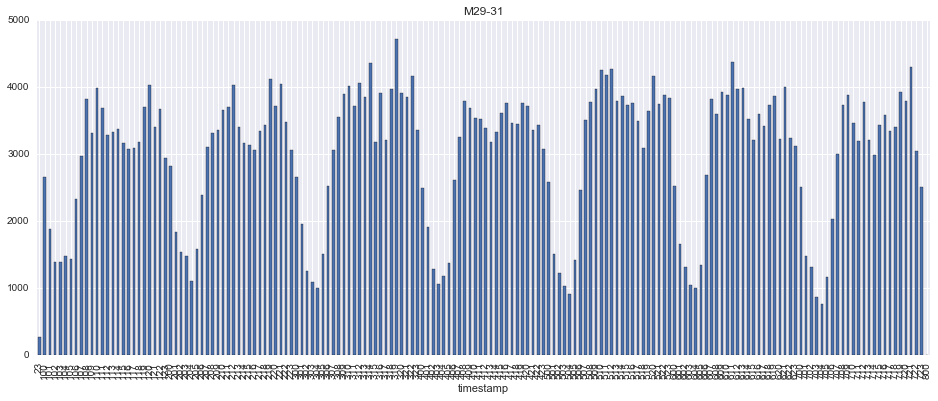

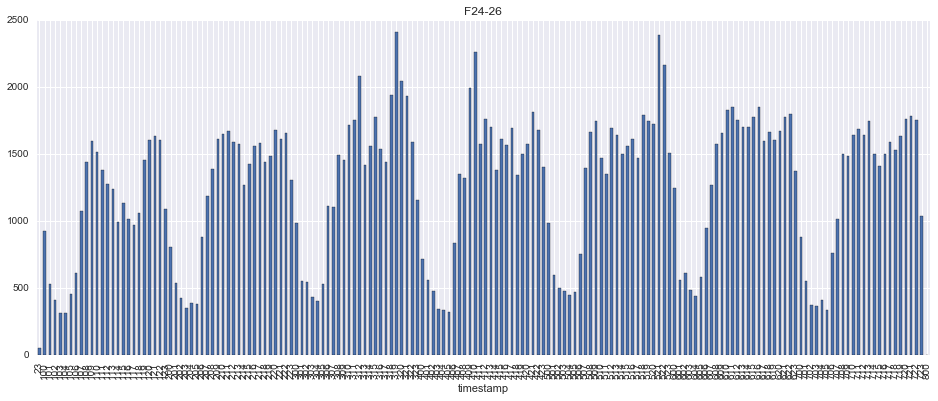

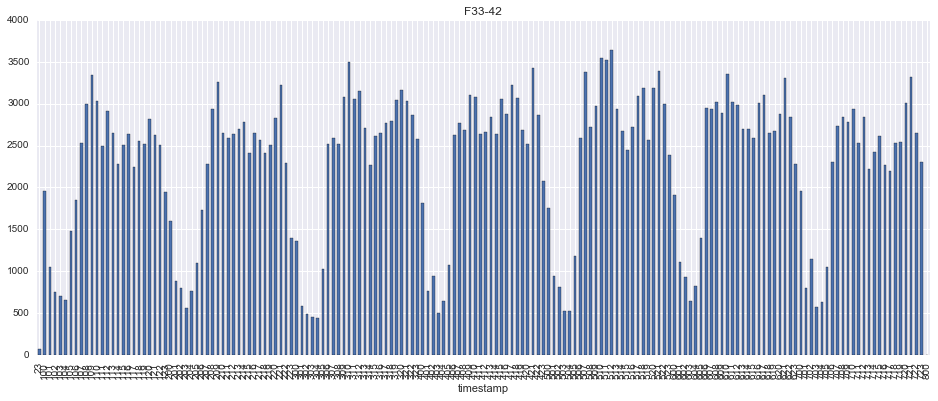

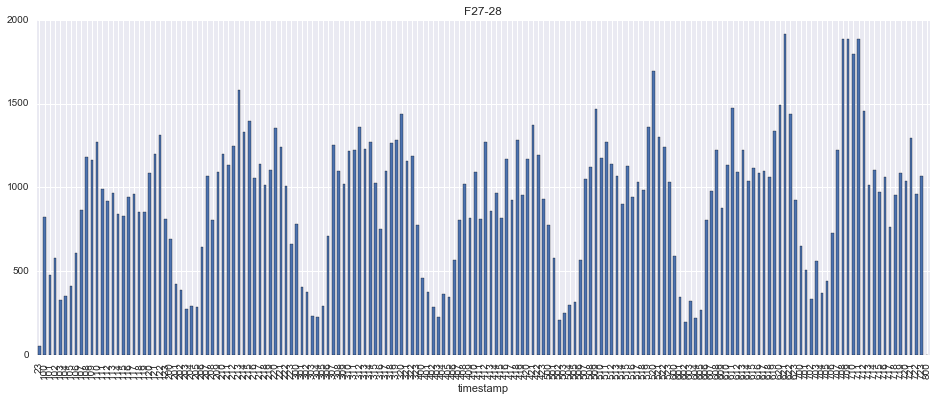

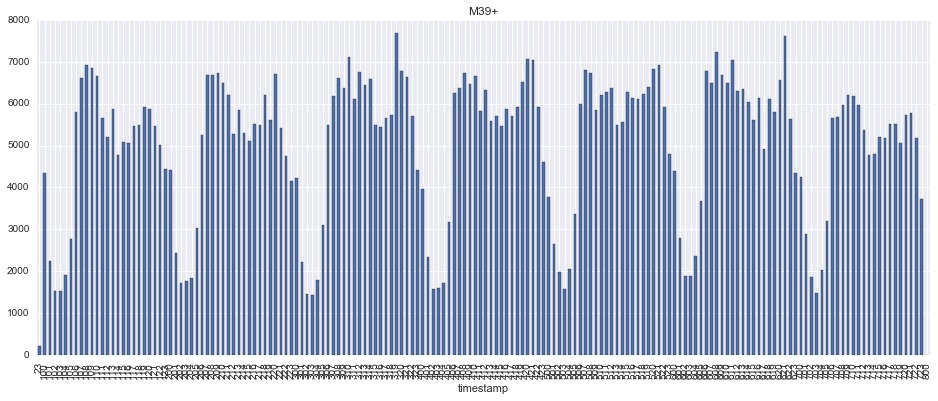

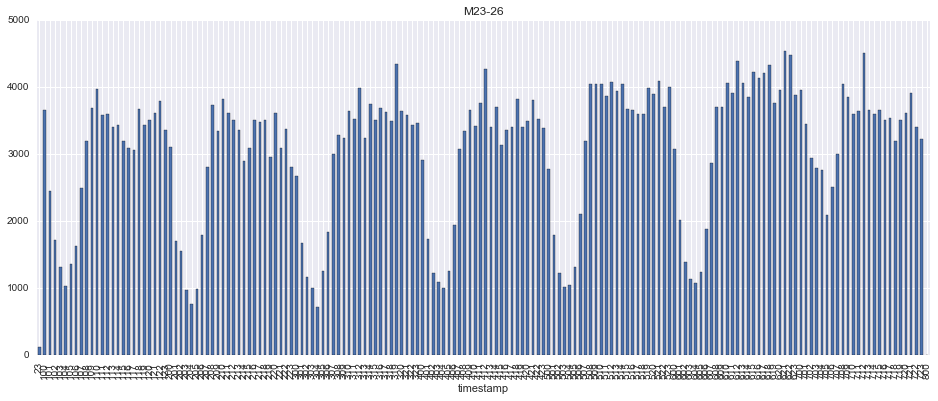

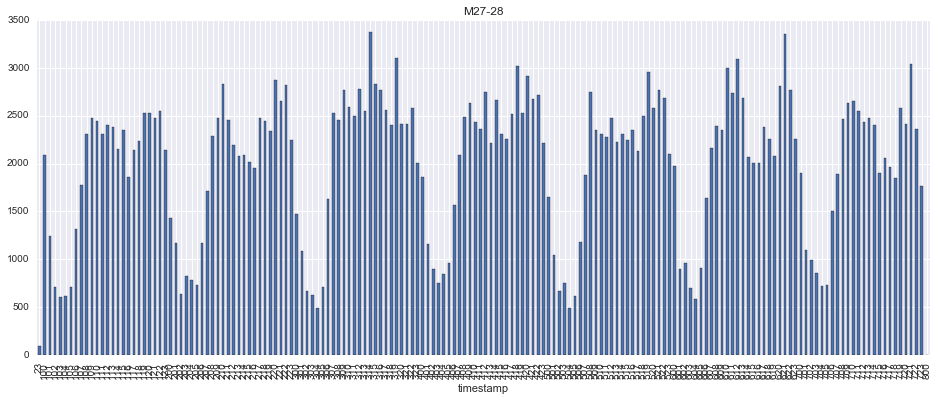

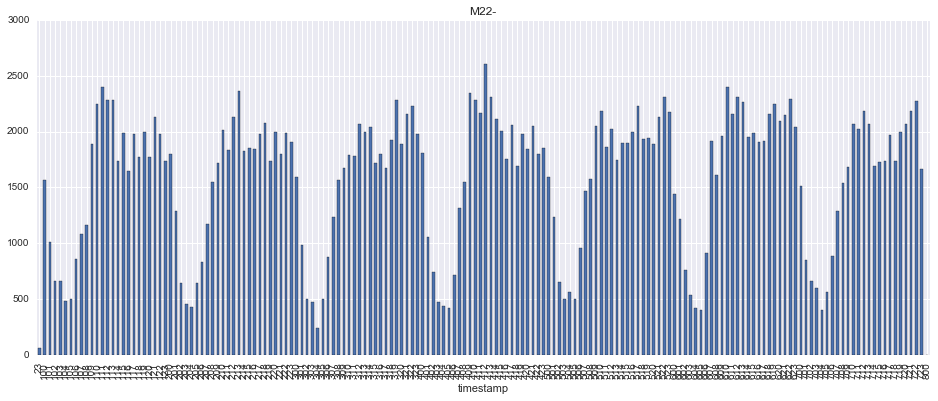

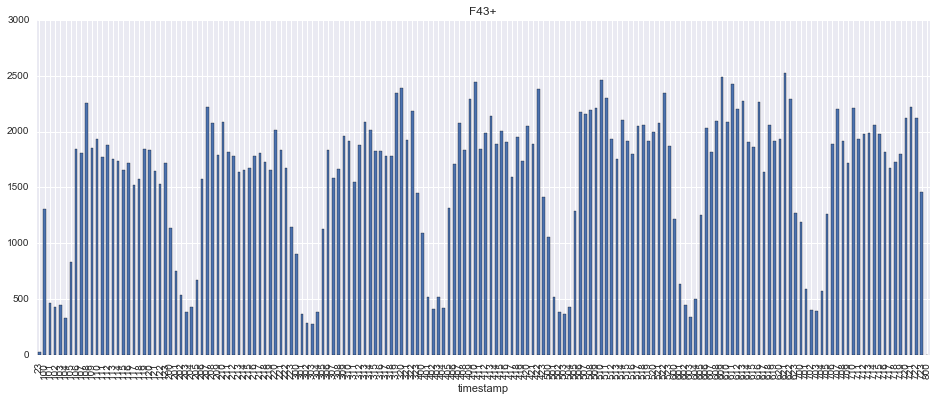

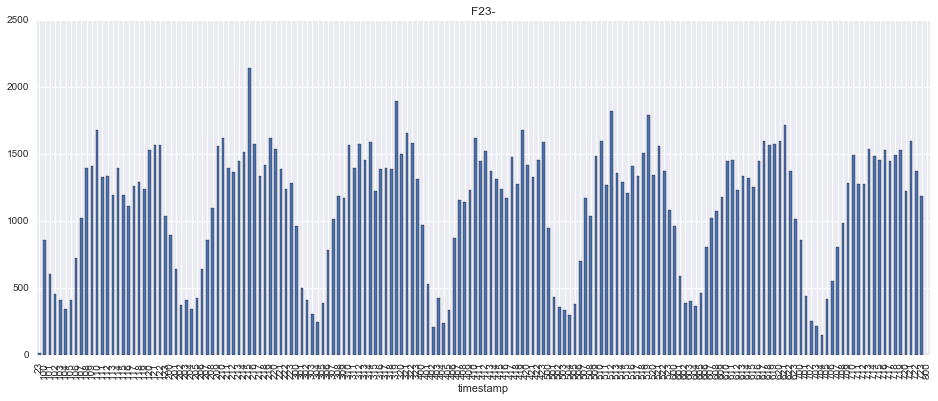

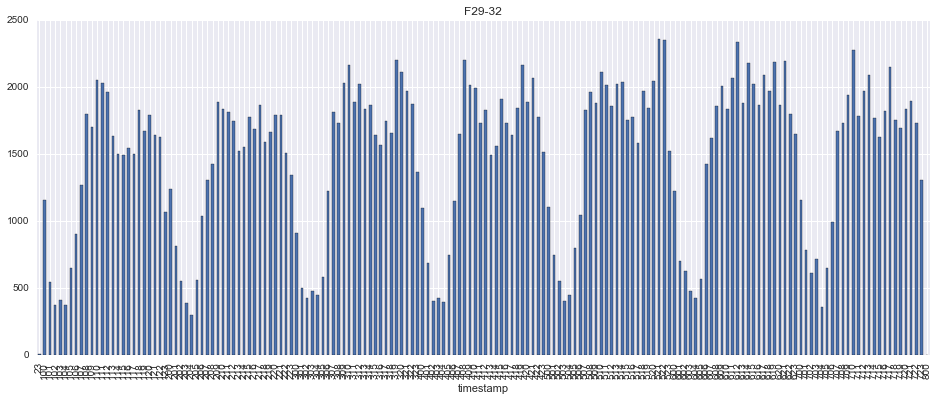

In [19]:
for g in groups:
    plt.figure()
    events_per_group[g].plot(kind='bar', figsize=(16,6))
    plt.title(g)

In [20]:
events_mu = events.groupby(['group','timestamp']).is_active.sum().unstack('group').mean(axis=1)
events_mu.head()

timestamp
23       95.833333
100    2115.666667
101    1278.666667
102     917.250000
103     793.833333
dtype: float64

In [21]:
events_per_group_mu = events.groupby(['group','timestamp']).is_active.sum().unstack('group')

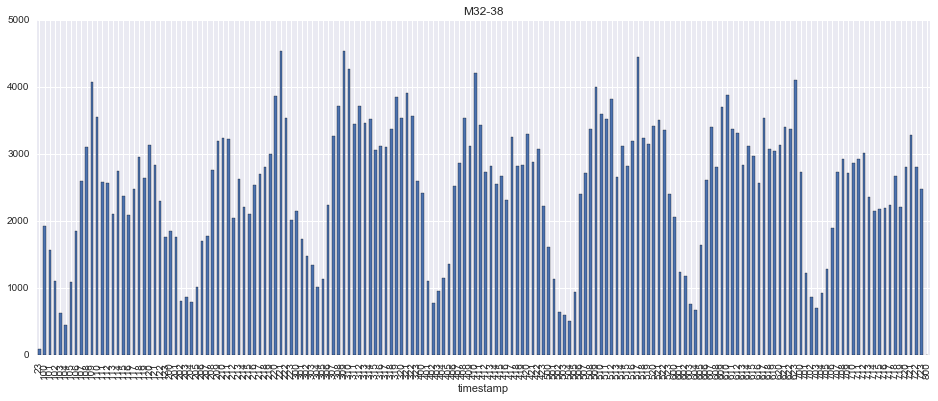

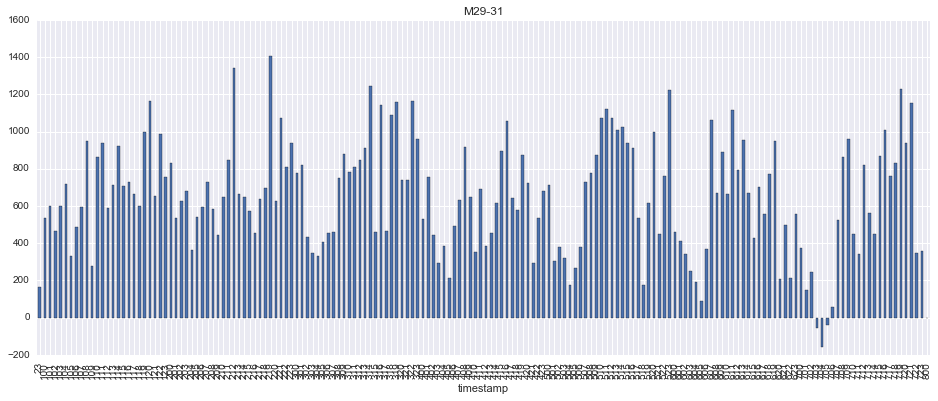

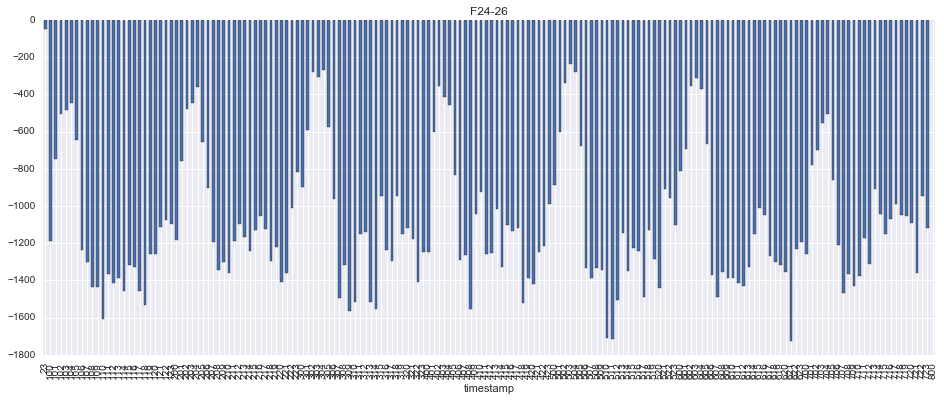

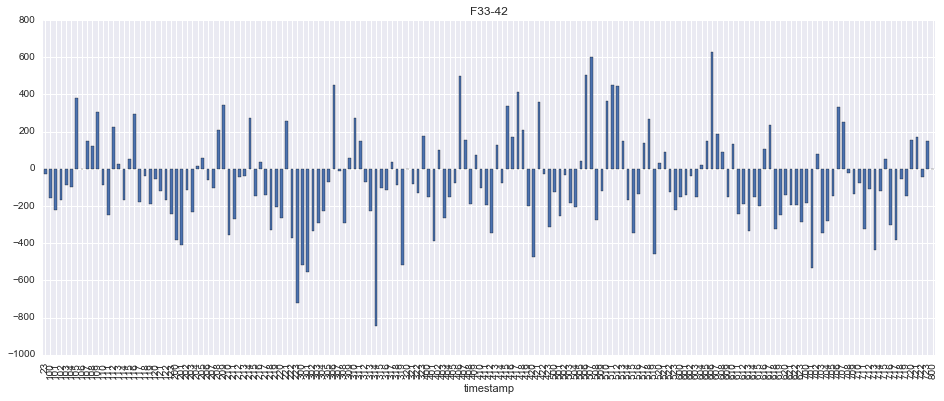

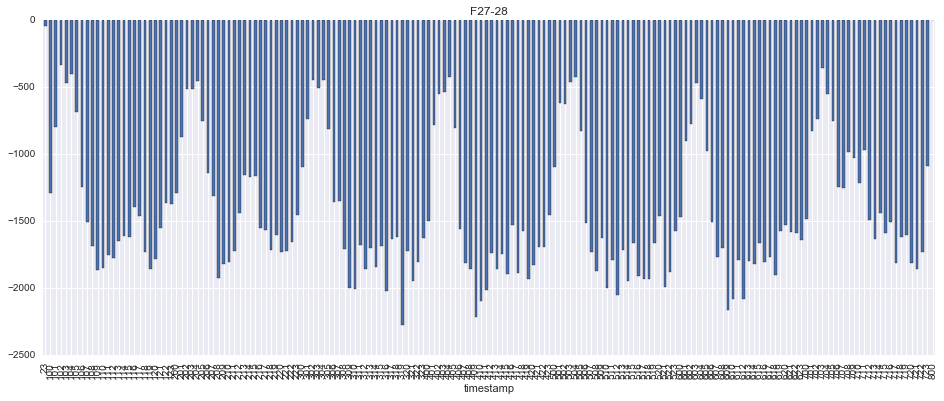

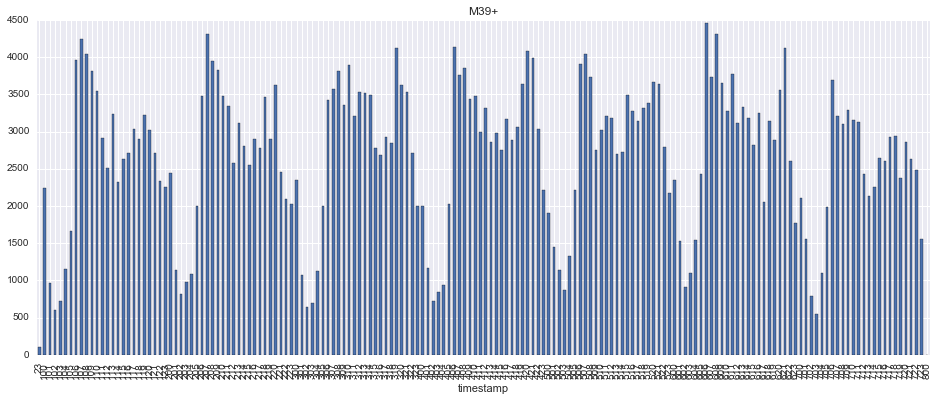

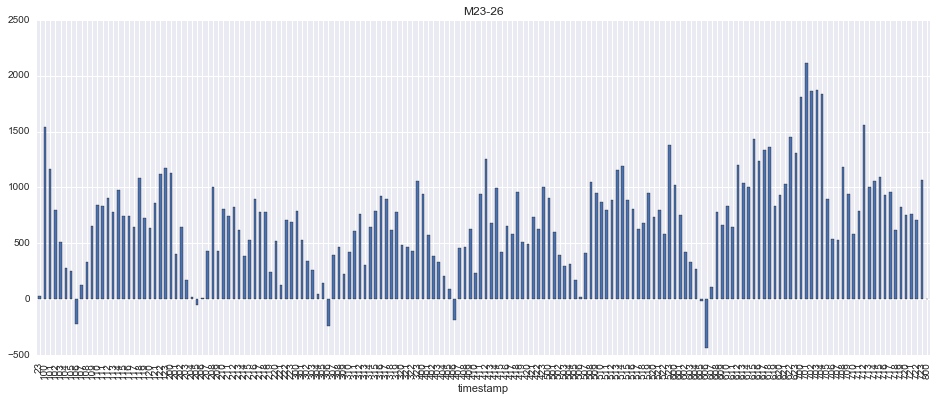

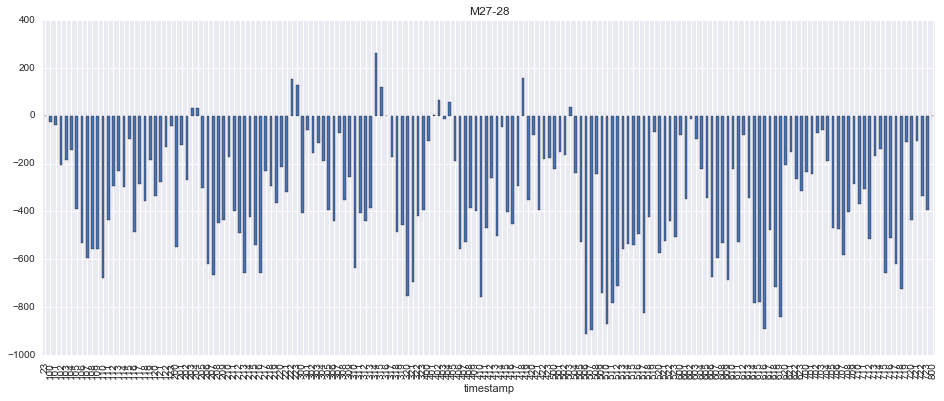

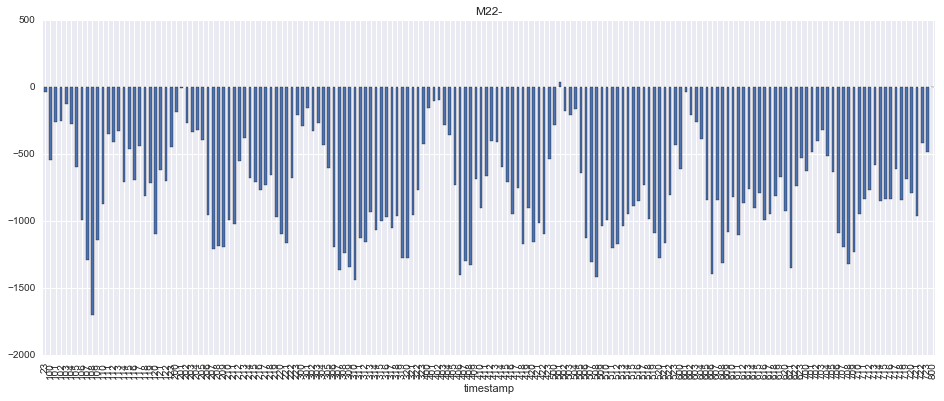

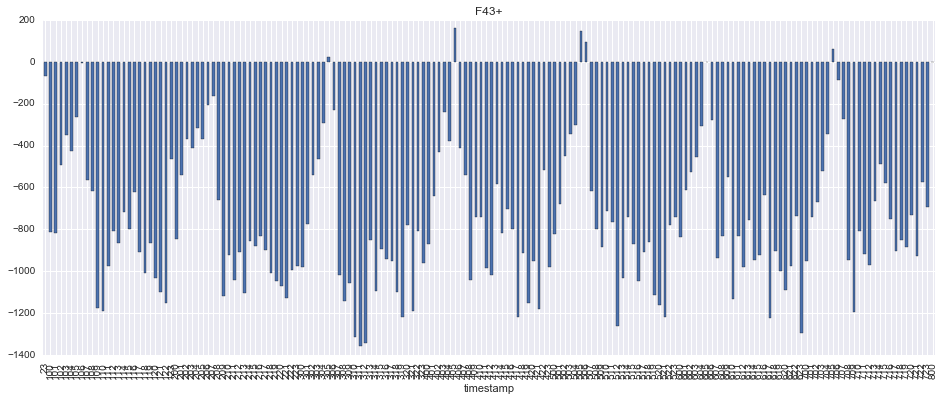

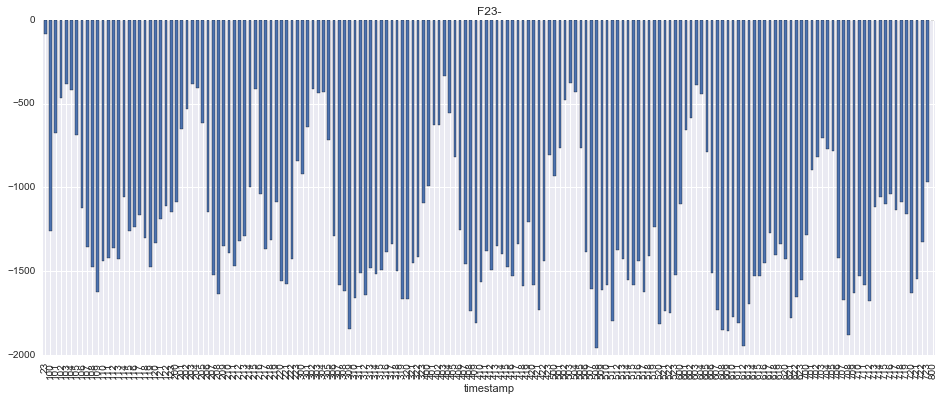

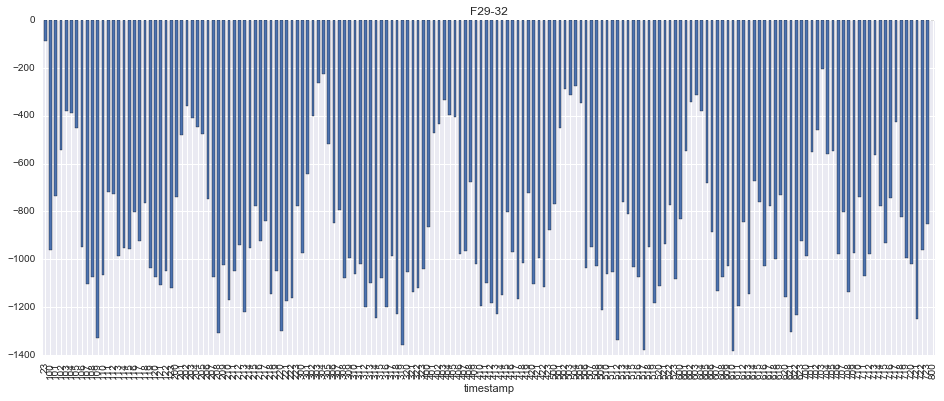

In [22]:
for g in groups:
    plt.figure()
    (events_per_group_mu[g]-events_mu).plot(kind='bar', figsize=(16,6))
    plt.title(g)

## Events per hour

In [23]:
events_hour_per_group = events.groupby(['group','timestamp_h']).is_active.sum().unstack('group')

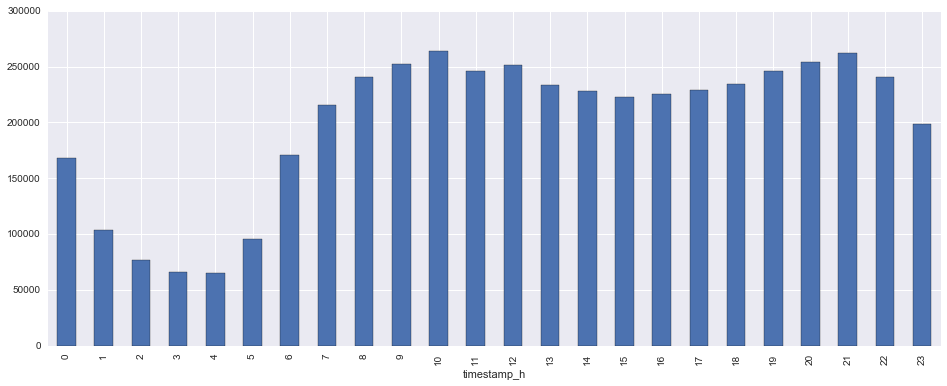

In [45]:
events_hour_per_group.sum(axis=1).plot(kind='bar', figsize=(16,6))

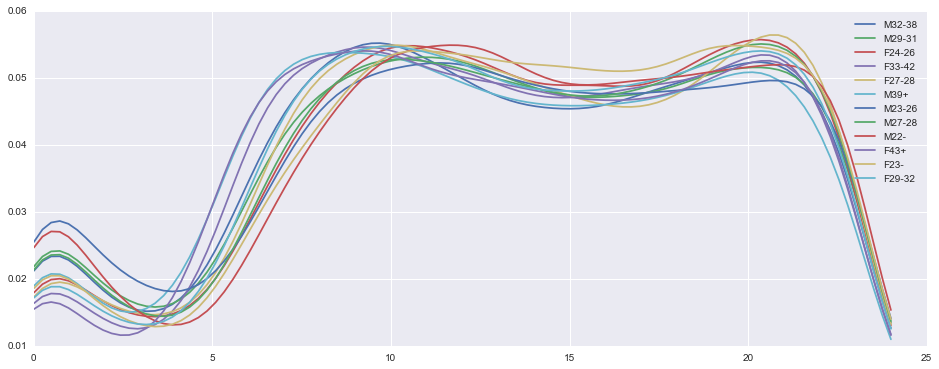

In [93]:
x = np.linspace(0,24,100).reshape(-1,1)
plt.figure(figsize=(16,6))
for g in groups: 
    data = events[events.group==g].timestamp_h.reshape(-1,1)
    kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(data)
    log_dens = kde.score_samples(x)
    plt.plot(x, np.exp(log_dens), label=g)
plt.legend()


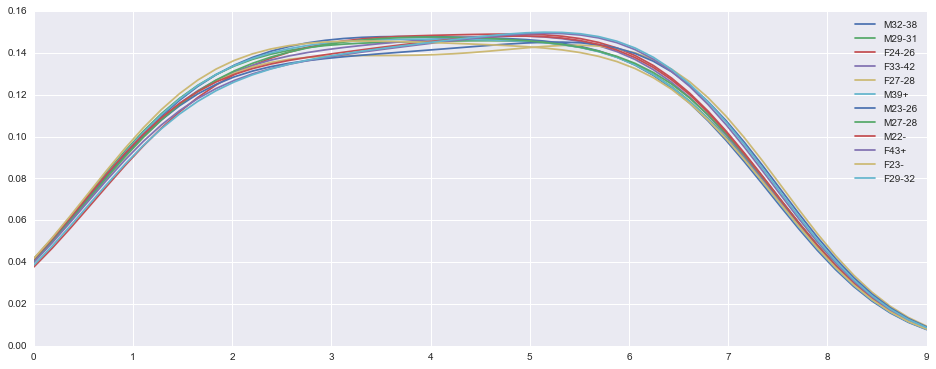

In [80]:
x = np.linspace(0,9).reshape(-1,1)
plt.figure(figsize=(16,6))
for g in groups: 
    data = events[events.group==g].timestamp_d.reshape(-1,1)
    kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(data)
    log_dens = kde.score_samples(x)
    plt.plot(x, np.exp(log_dens), label=g)
plt.legend()

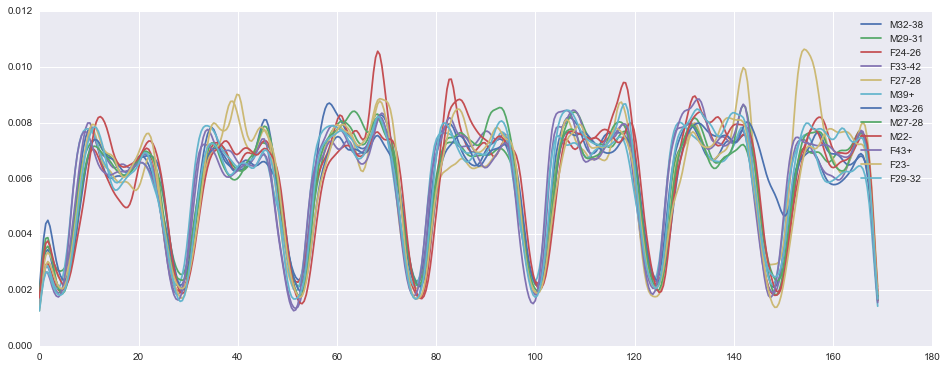

In [94]:
x = np.linspace(0,169,400).reshape(-1,1)

plt.figure(figsize=(16,6))
kdes = []
for g in groups: 
    data = events[events.group==g].timestamp_le.reshape(-1,1)
    kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(data)
    kdes.append(kde)
    log_dens = kde.score_samples(x)
    plt.plot(x, np.exp(log_dens), label=g)
plt.legend()

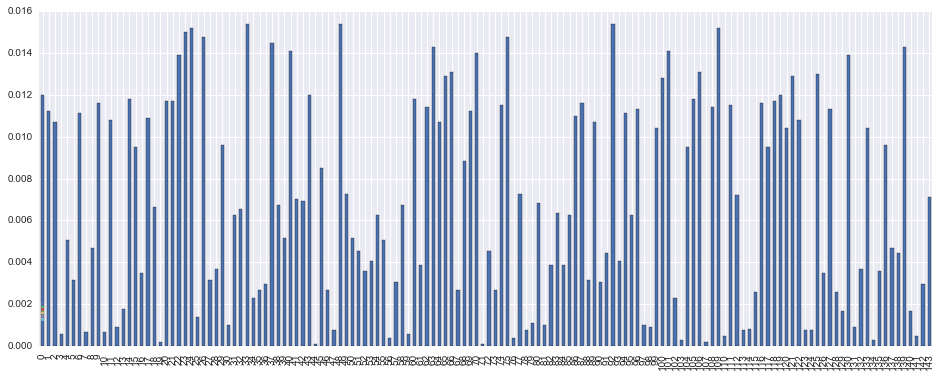

In [121]:
# Take a random sample
data = events[events.device_id==29182687948017175].timestamp_le
data /= data.sum()
plt.figure(figsize=(16,6))
data.plot(kind='bar', figsize=(16,6))
for kde in kdes:
    plt.plot(data.unique(), np.exp(kde.score_samples(data.unique().reshape(-1,1))))

In [116]:

for kde in kdes:
    print kde.score(data.reshape(-1,1))

-926.273665324
-918.849841676
-942.913017133
-946.024070158
-929.623317005
-946.612056266
-891.129789754
-905.335485972
-915.313127417
-950.119519316
-960.307249594
-961.123937451


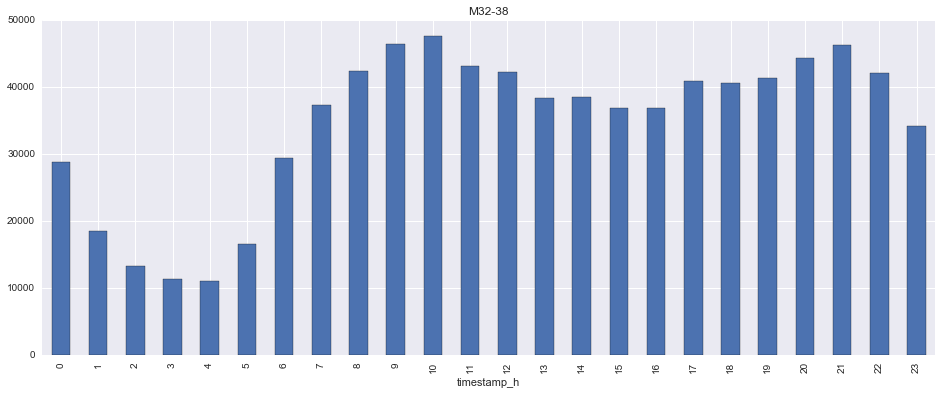

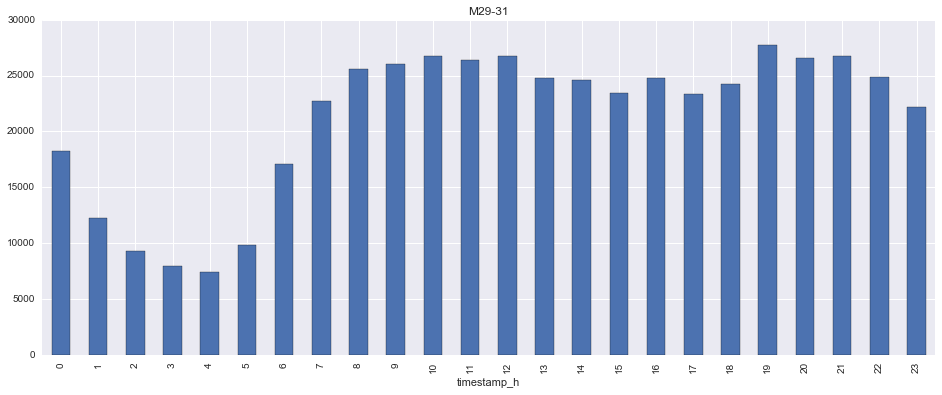

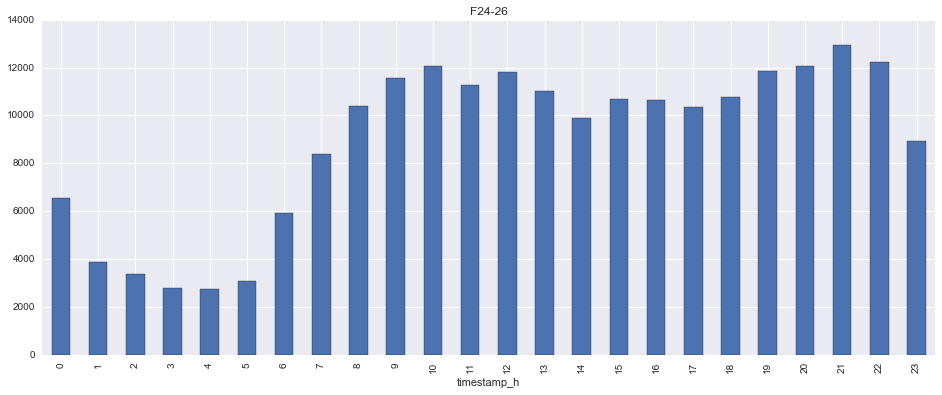

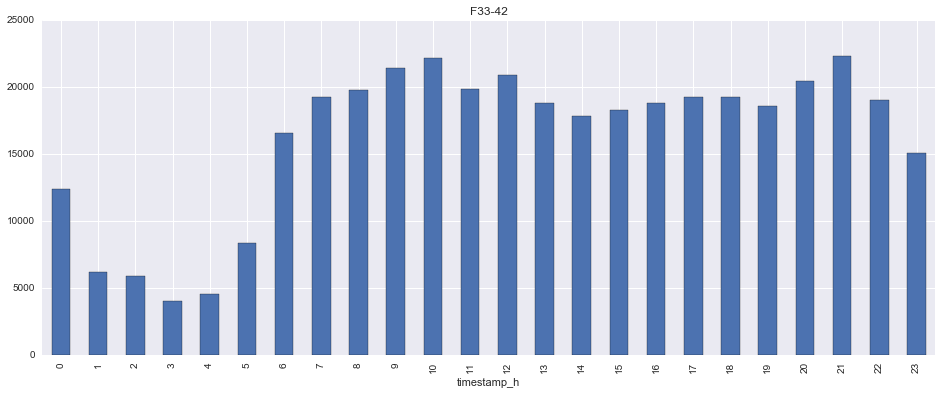

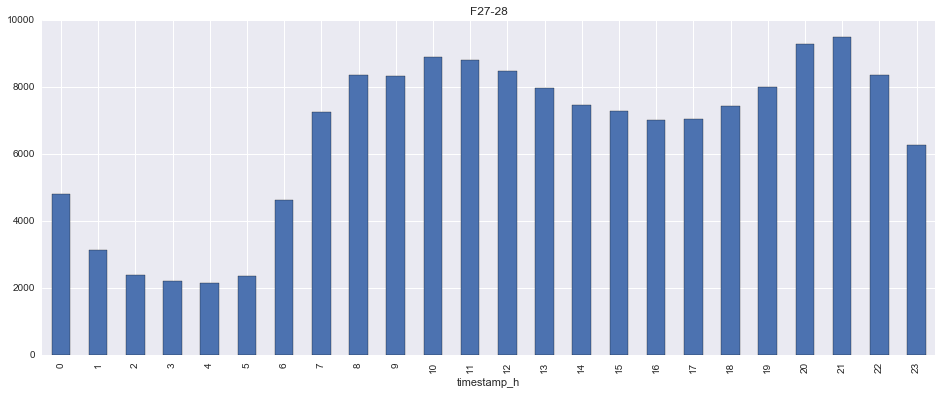

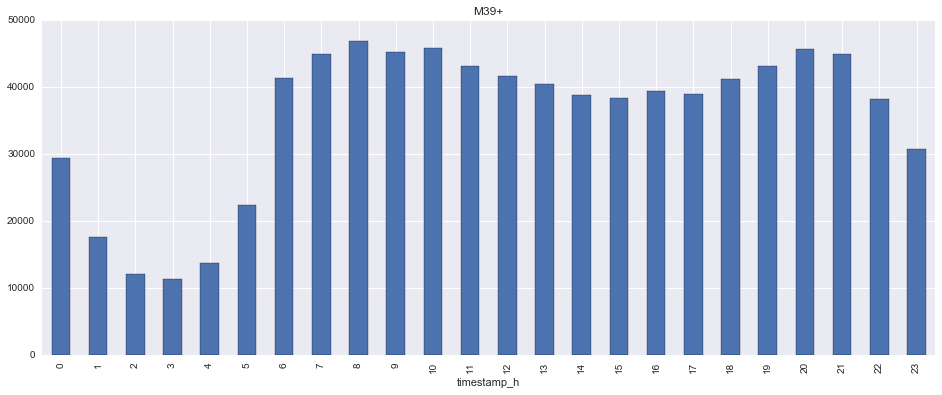

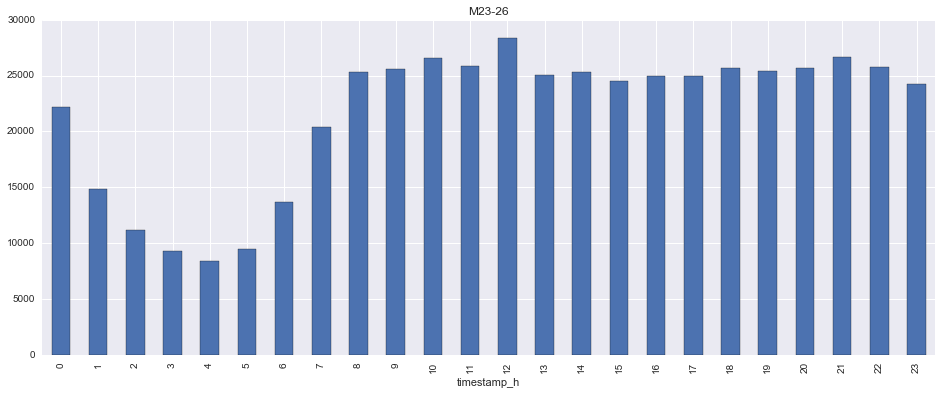

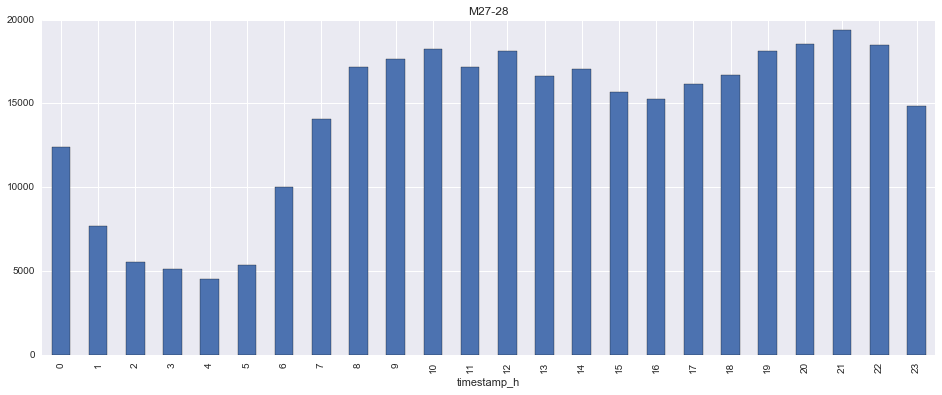

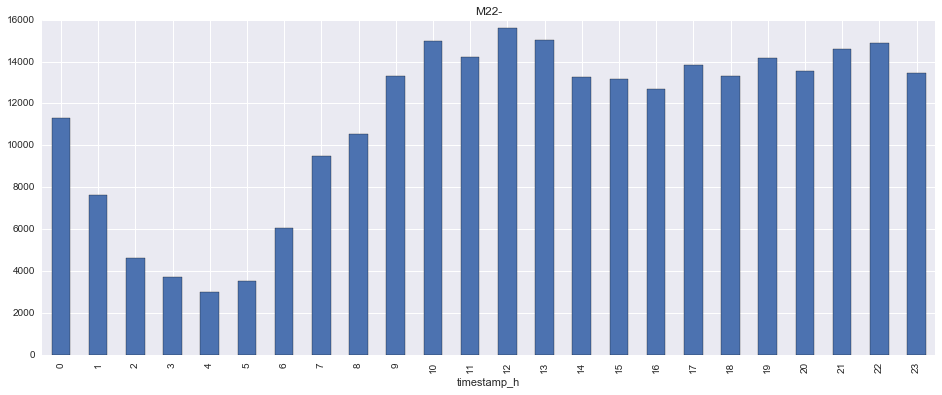

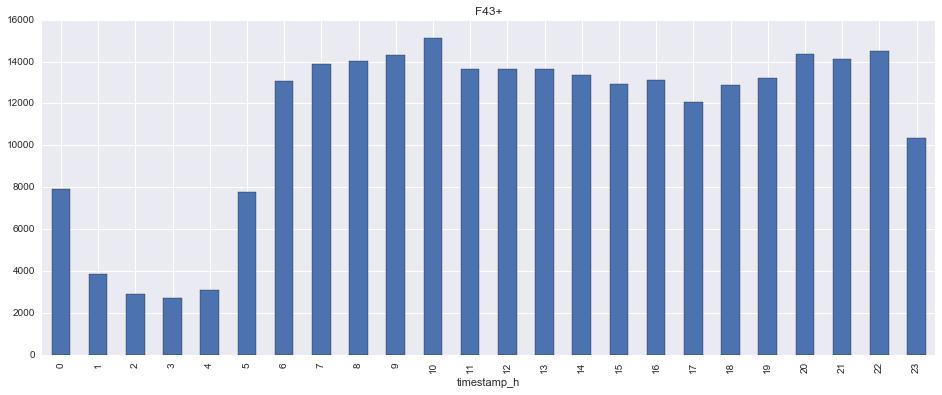

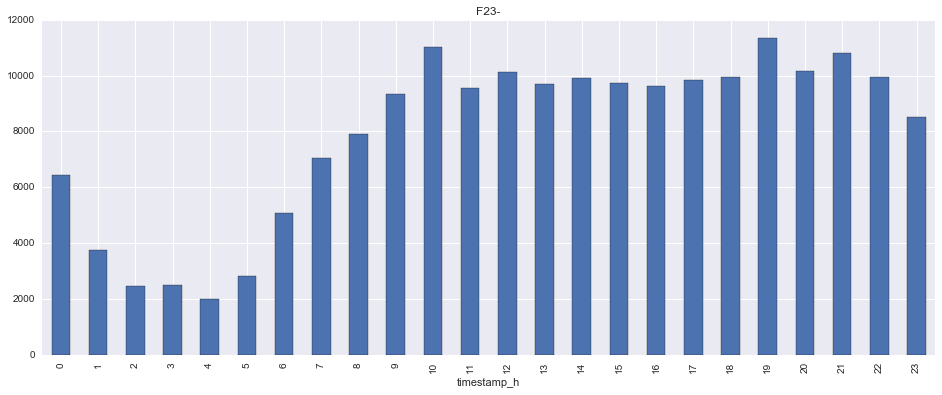

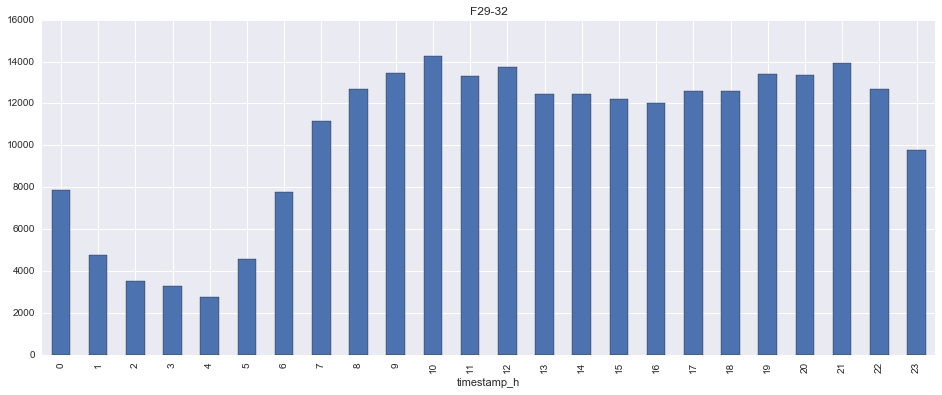

In [24]:
for g in groups:
    plt.figure()
    events_hour_per_group[g].plot(kind='bar', figsize=(16,6))
    plt.title(g)

In [25]:
events_hour_per_group = events.groupby(['group','timestamp_h']).is_active.sum().unstack('group')
events_hour_mu = events.groupby(['group','timestamp_h']).is_active.sum().unstack('group').mean(axis=1)
events_hour_mu.head()

timestamp_h
0    14013.416667
1     8647.916667
2     6362.000000
3     5508.583333
4     5424.750000
dtype: float64

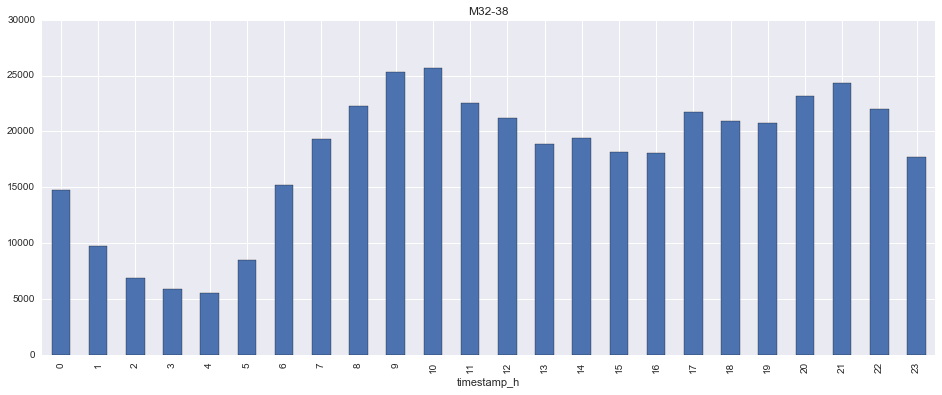

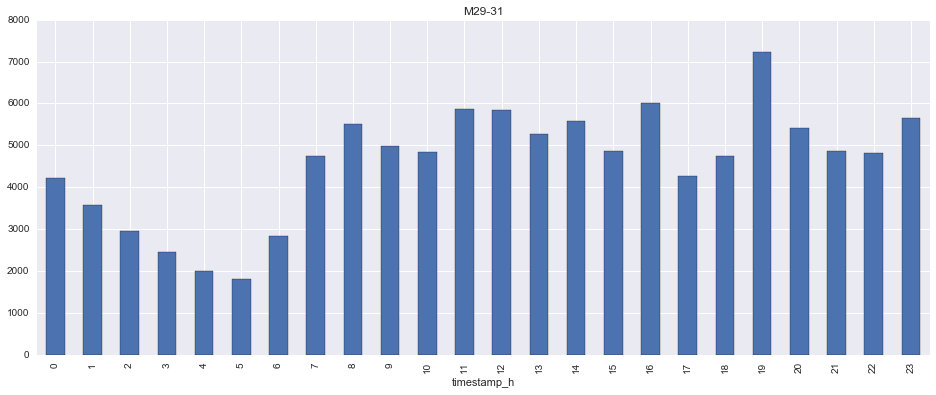

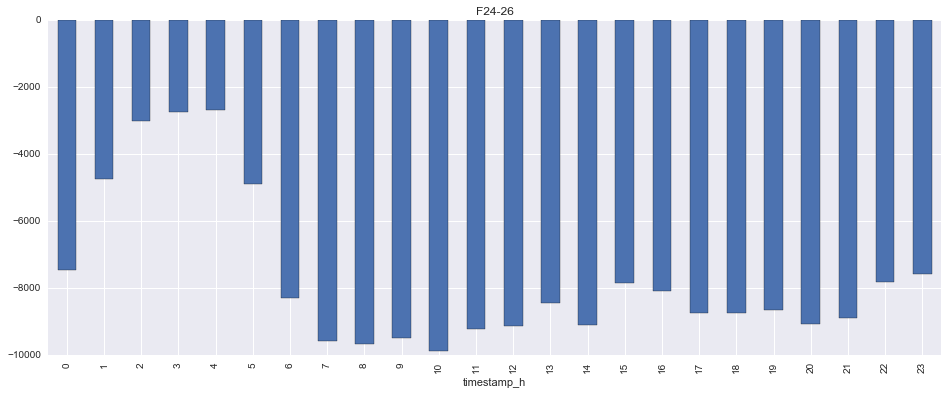

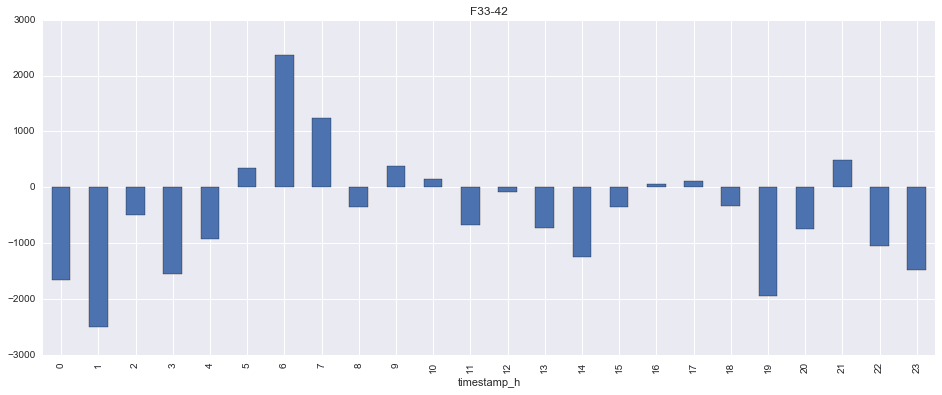

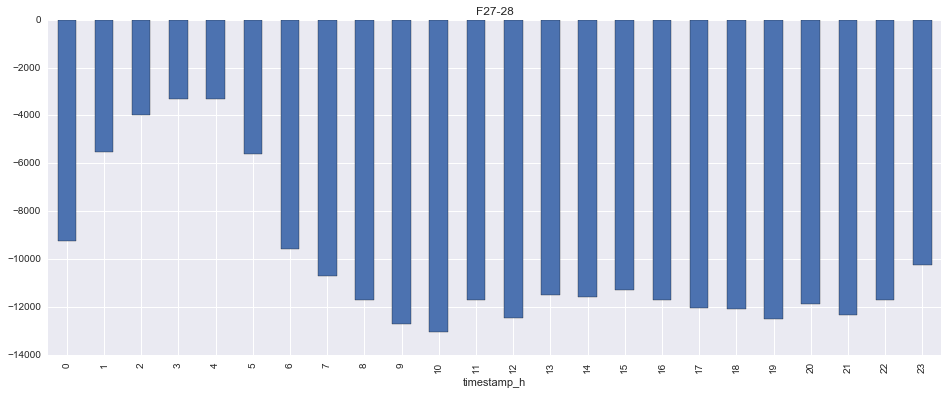

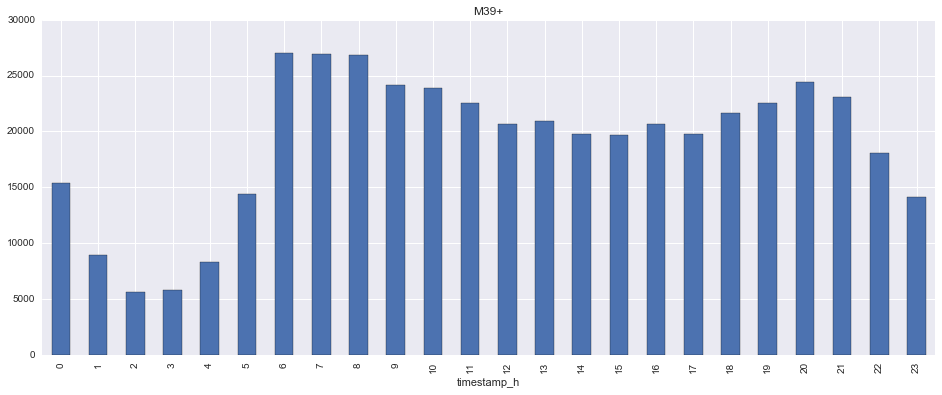

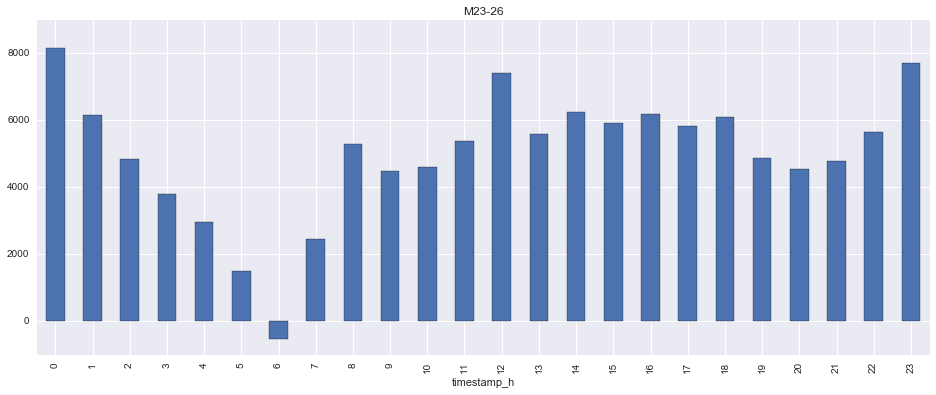

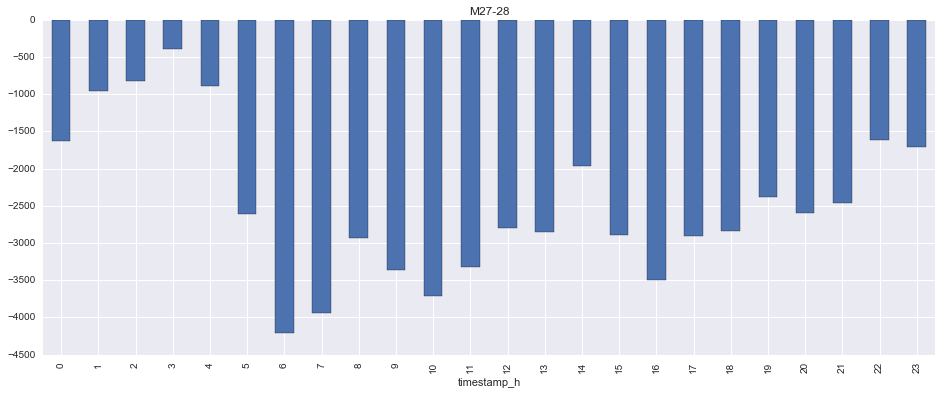

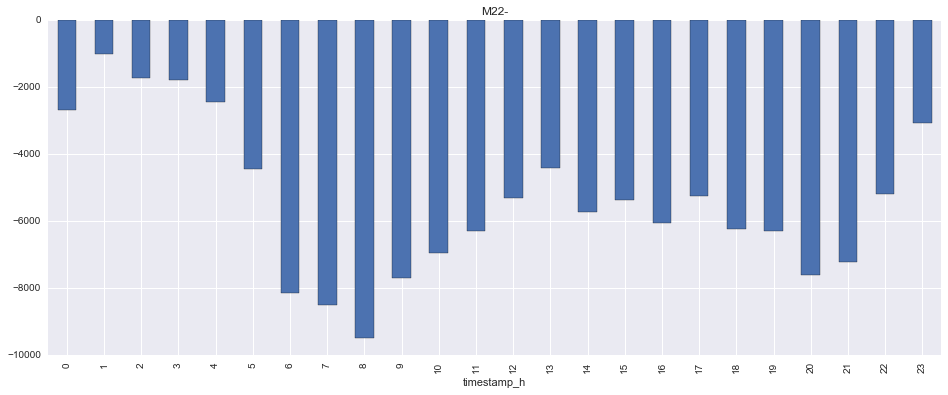

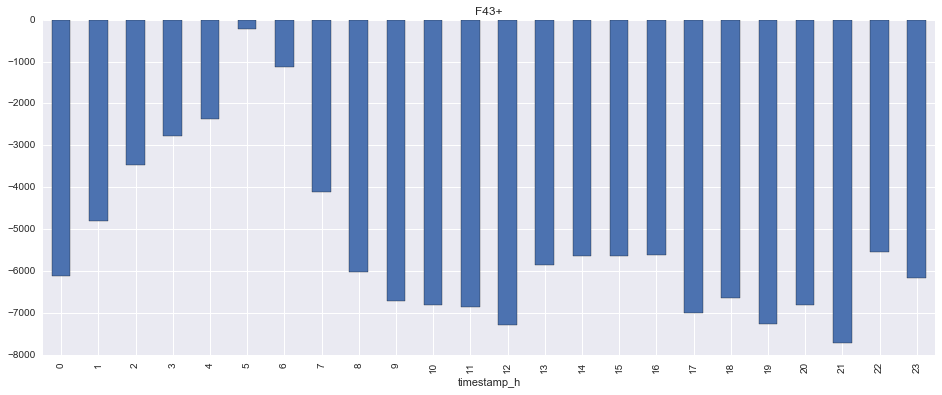

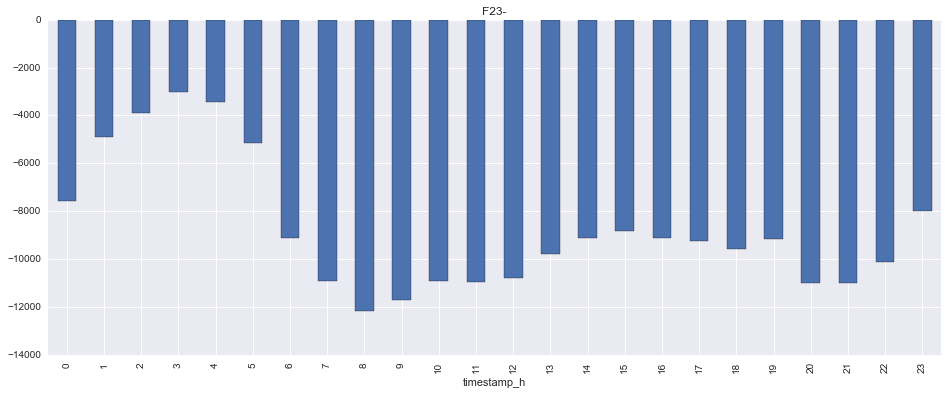

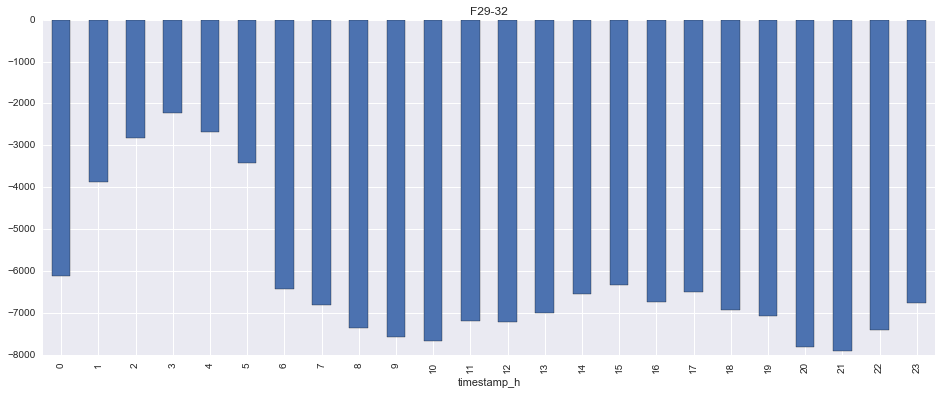

In [26]:
for g in groups:
    plt.figure()
    (events_hour_per_group[g]-events_hour_mu).plot(kind='bar', figsize=(16,6))
    plt.title(g)

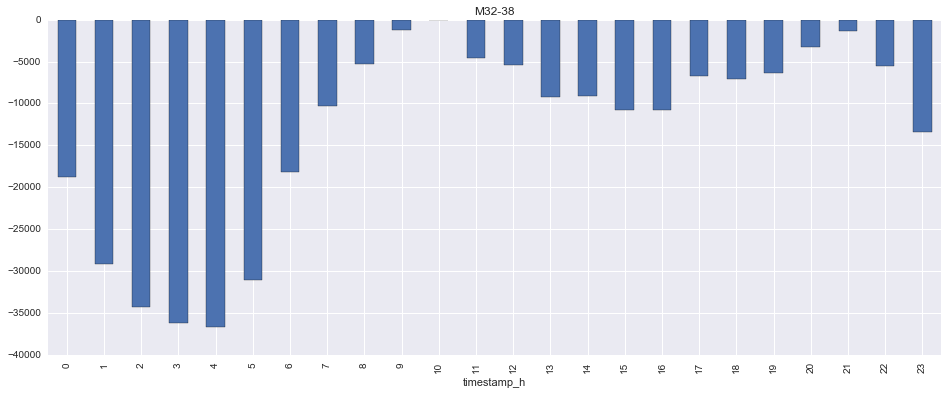

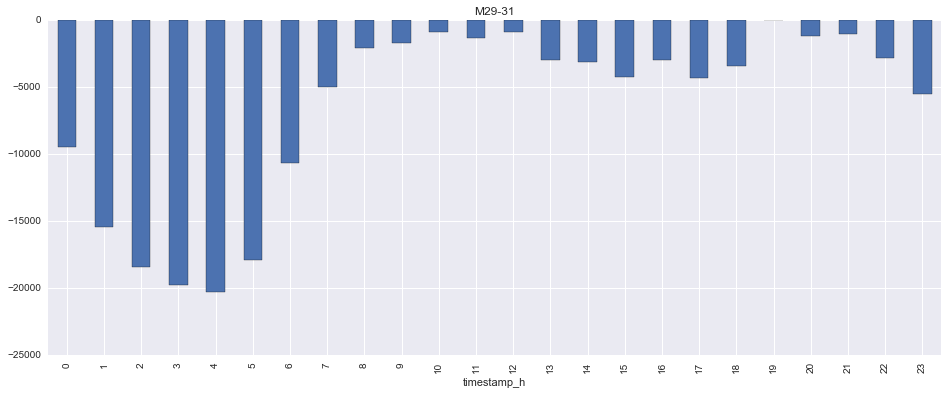

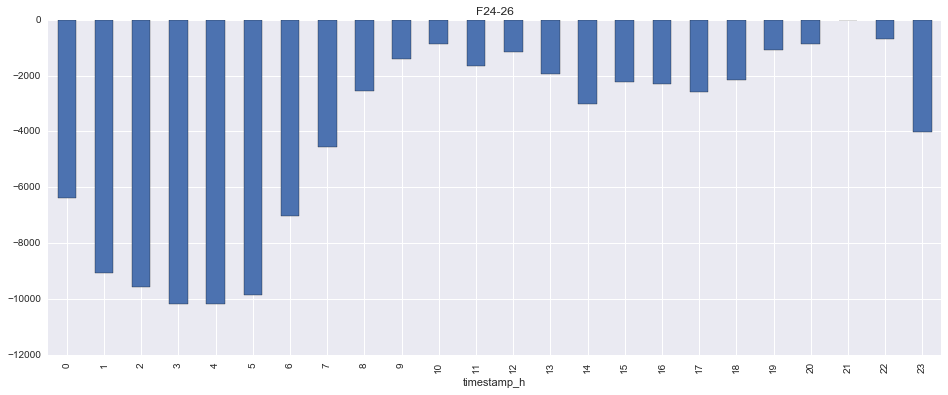

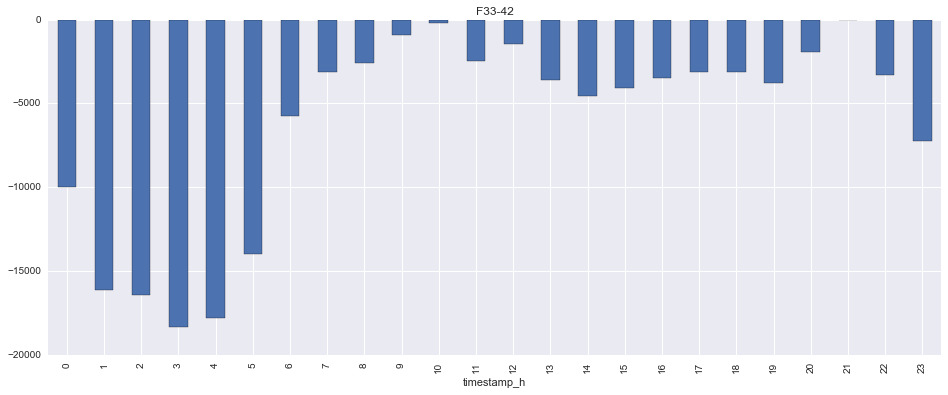

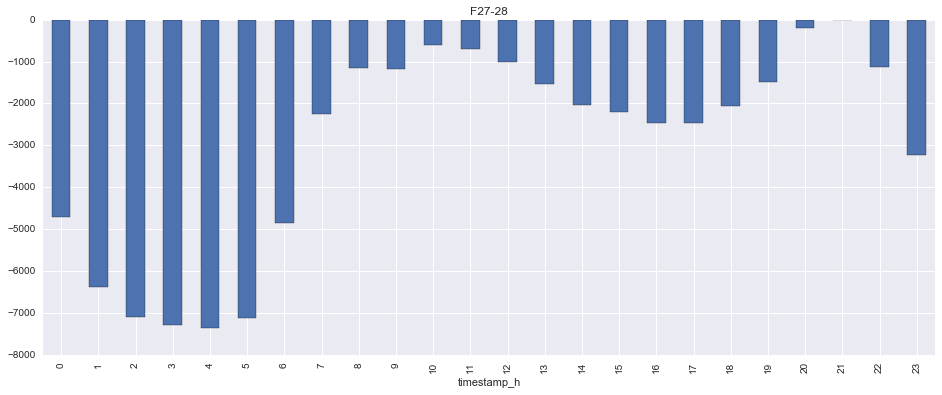

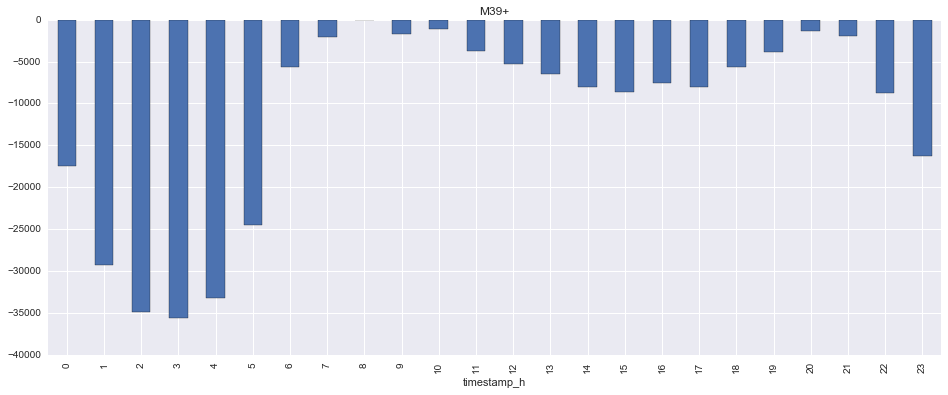

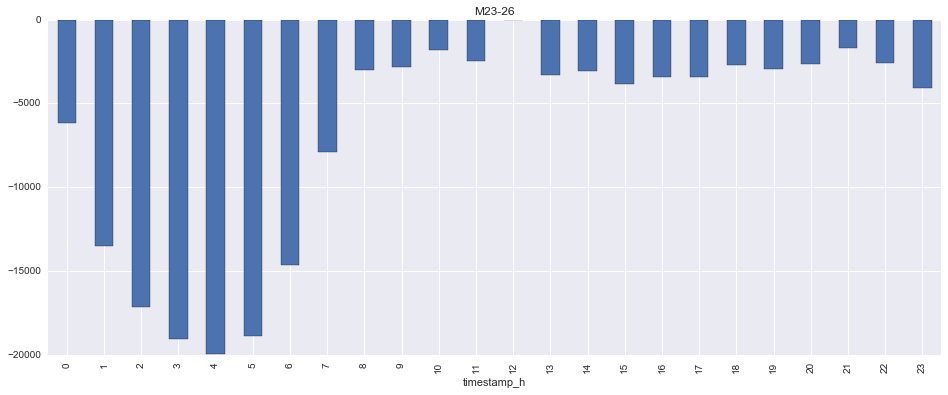

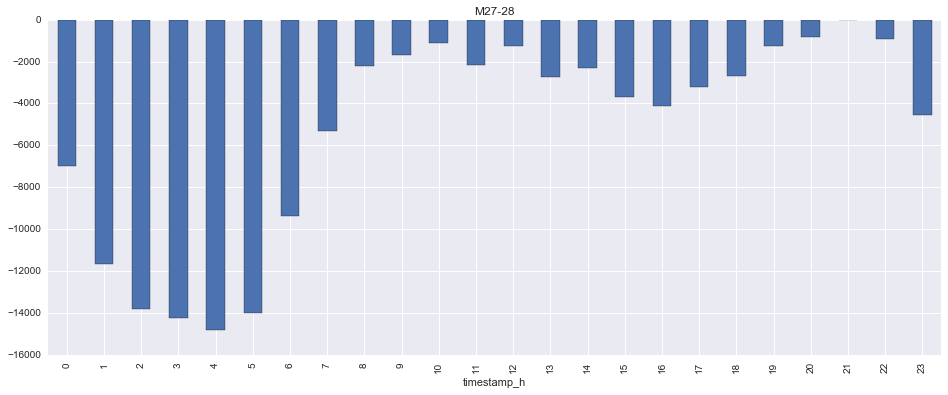

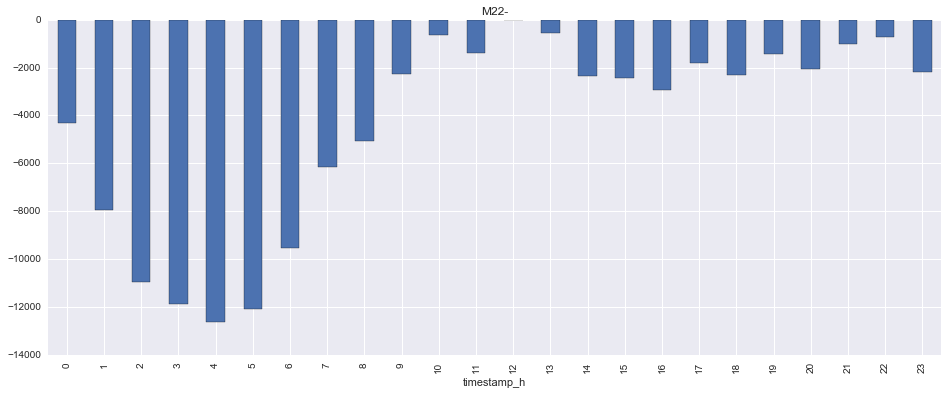

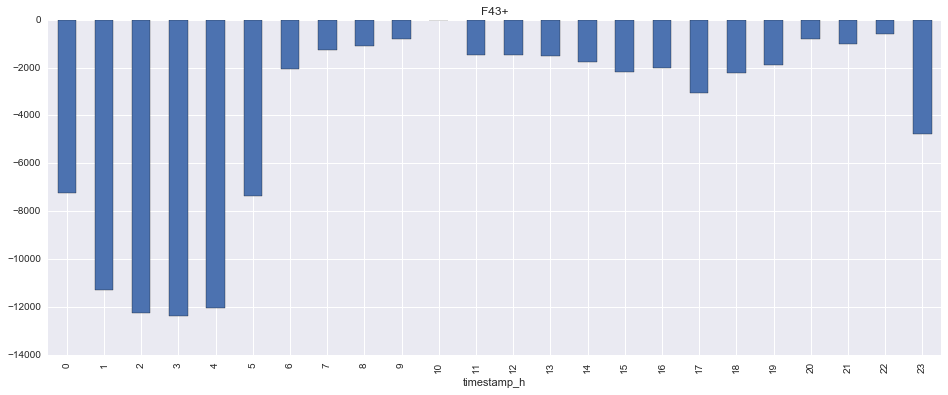

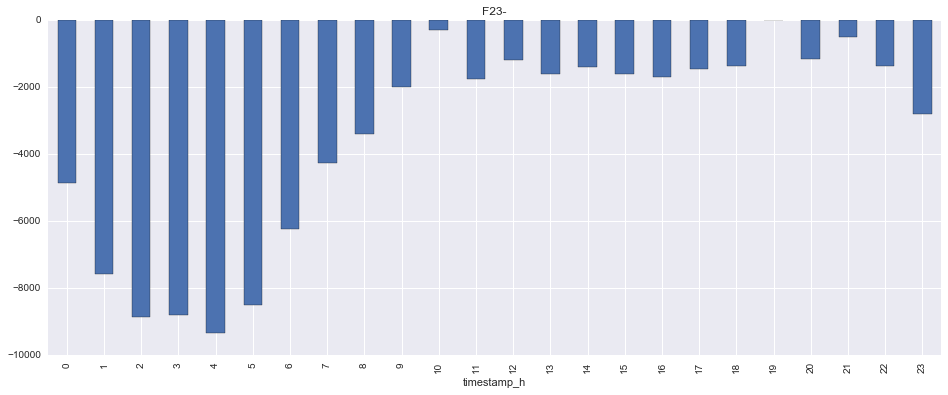

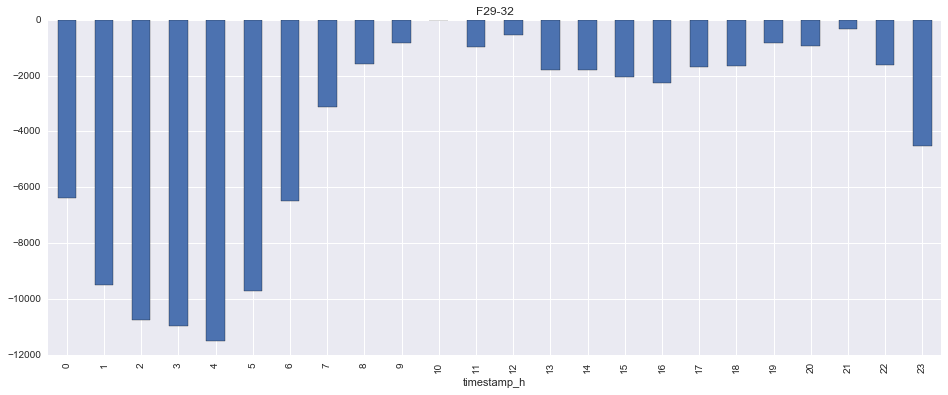

In [27]:
for g in groups:
    plt.figure()
    (events_hour_per_group[g]-events_hour_per_group[g].max()).plot(kind='bar', figsize=(16,6))
    plt.title(g)

In [28]:
events_hour_per_group.max()-events_hour_per_group.mean()

group
F23-       3433.791667
F24-26     3982.875000
F27-28     2938.875000
F29-32     3834.583333
F33-42     6146.500000
F43+       3860.625000
M22-       4364.541667
M23-26     6709.833333
M27-28     5212.916667
M29-31     6509.000000
M32-38    13129.291667
M39+      11298.916667
dtype: float64

In [29]:
events_per_hour = events.groupby(['device_id','group','timestamp_h']).is_active.sum().unstack('timestamp_h').reset_index('group')

events_per_hour.group = LabelEncoder().fit_transform(events_per_hour.group)
events_per_hour.head()

timestamp_h,group,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,...,55.0,172.0,NaN,NaN,NaN,NaN,86.0,68.0,NaN,42.0
-9221026417907250887,3,NaN,NaN,NaN,NaN,NaN,NaN,26.0,108.0,39.0,...,NaN,10.0,11.0,11.0,17.0,6.0,18.0,NaN,30.0,8.0
-9220830859283101130,6,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,5.0,NaN,8.0
-9220061629197656378,11,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,1.0,...,3.0,NaN,2.0,1.0,4.0,4.0,2.0,4.0,NaN,NaN
-9218960997324667698,5,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN


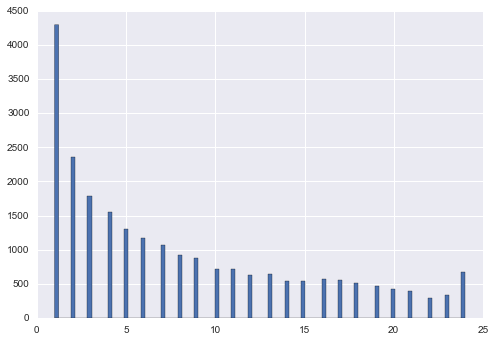

In [30]:
hours_without_events = 24-events_per_hour.isnull().sum(axis=1)
hours_without_events.hist(bins=100)

In [31]:
events_per_hour['max'] = events_per_hour.iloc[:,1:].max(axis=1)
events_per_hour['min'] = events_per_hour.iloc[:,1:].min(axis=1)
events_per_hour['mean'] = events_per_hour.iloc[:,1:].mean(axis=1)
events_per_hour['std'] = events_per_hour.iloc[:,1:].std(axis=1)
events_per_hour['n'] = 24-events_per_hour.isnull().sum(axis=1)
events_per_hour.head()

timestamp_h,group,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,max,min,mean,std,n
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,...,NaN,86.0,68.0,NaN,42.0,172.0,21.0,82.090909,50.031725,9
-9221026417907250887,3,NaN,NaN,NaN,NaN,NaN,NaN,26.0,108.0,39.0,...,6.0,18.0,NaN,30.0,8.0,108.0,6.0,25.444444,30.454378,16
-9220830859283101130,6,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,5.0,NaN,8.0,12.0,5.0,8.000000,3.000000,4
-9220061629197656378,11,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,1.0,...,4.0,2.0,4.0,NaN,NaN,17.0,1.0,5.125000,5.085211,14
-9218960997324667698,5,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,24.0,NaN,24.0,6.0,14.333333,7.408704,4


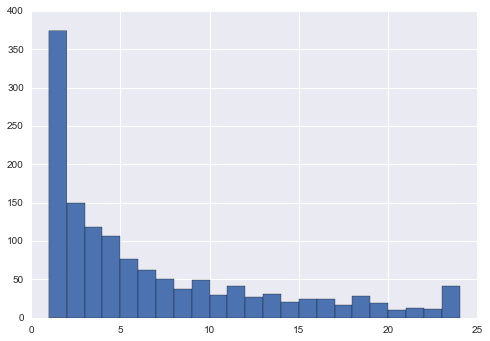

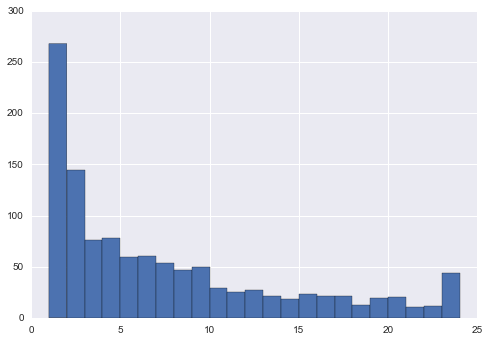

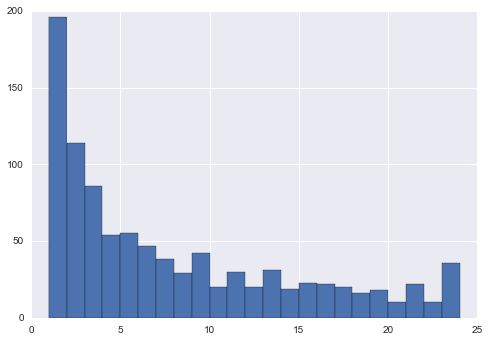

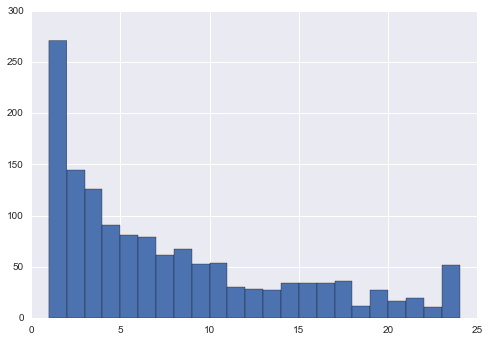

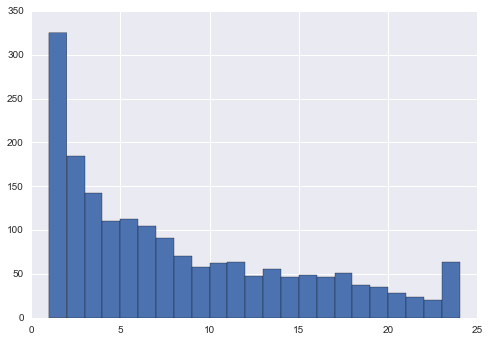

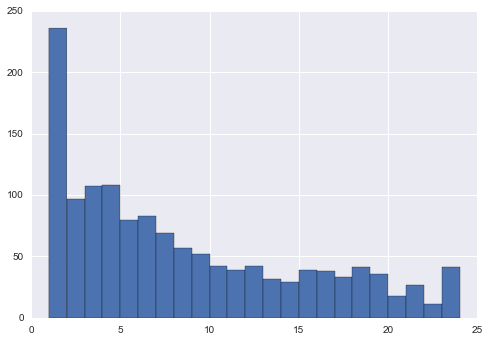

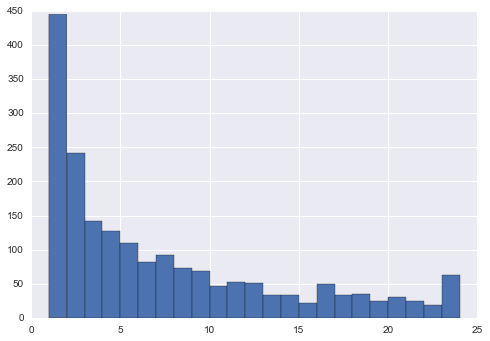

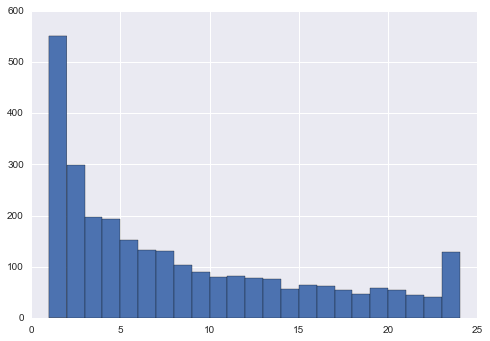

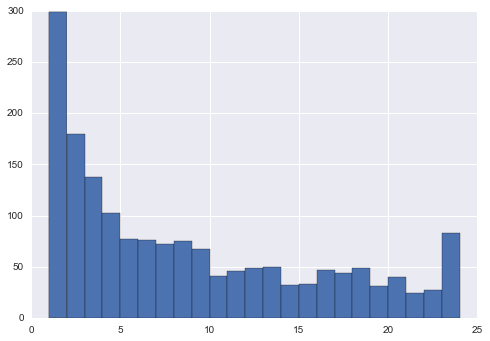

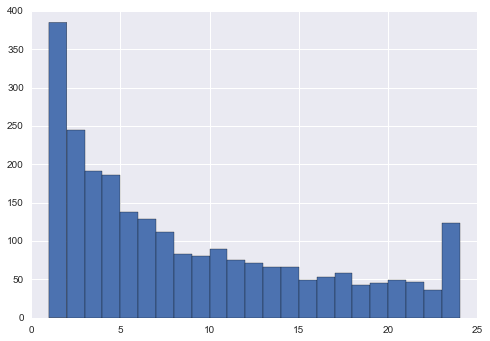

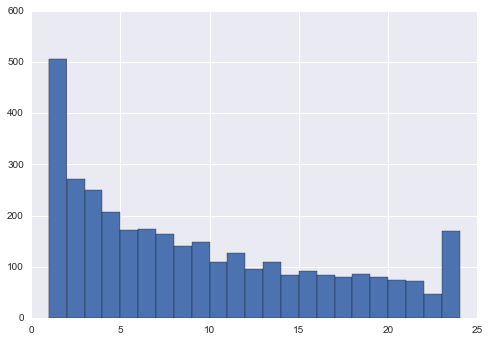

In [32]:
for i in range(11):
    plt.figure()
    events_per_hour[events_per_hour.group==i]['n'].hist(bins=23)

In [147]:
events_per_hour = events_per_hour[hours_without_events>20]

/Users/joostbloom/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


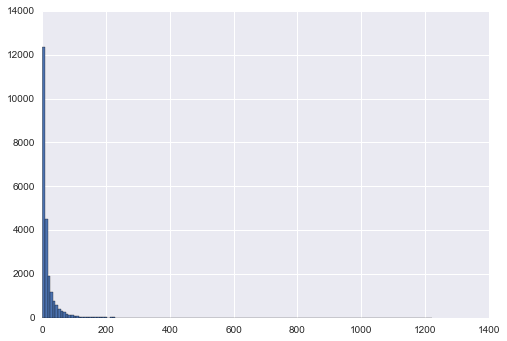

In [33]:
(events_per_hour.iloc[:,1:].max(axis=1)-events_per_hour.iloc[:,1:].mean(axis=1)).hist(bins=150)

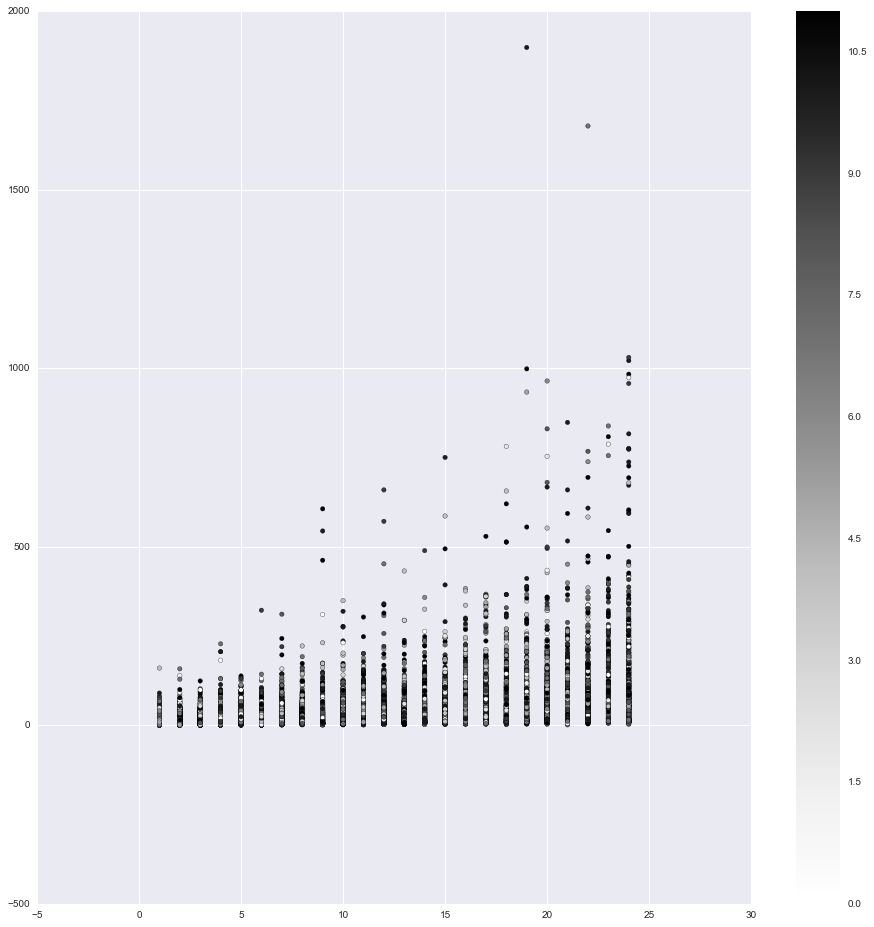

In [39]:
plt.figure( figsize=(16,16))
plt.scatter(x=events_per_hour.iloc[:,1:]['n'], y=events_per_hour.iloc[:,1:]['max'],
            c=events_per_hour.group)
plt.colorbar()
#plt.xlim([0,100])
#plt.ylim([0,60])

In [43]:
events_per_hour.groupby('mean').group.mean()

mean
0.000000       6.279070
0.250000       6.000000
0.285714       2.000000
0.300000       8.000000
0.375000       3.000000
0.428571       6.000000
0.461538       4.000000
0.500000       6.333333
0.571429       5.000000
0.600000       6.666667
0.636364       2.000000
0.666667      11.000000
0.700000       4.000000
0.714286       8.000000
0.727273       5.000000
0.750000       8.000000
0.777778       5.000000
0.857143       5.000000
0.875000       9.333333
1.000000       6.597052
1.058824       1.000000
1.083333       7.000000
1.090909       6.000000
1.100000       4.500000
1.142857       3.500000
1.153846       7.000000
1.166667       5.333333
1.181818       4.333333
1.200000       7.666667
1.214286       7.500000
                ...    
277.045455     8.000000
283.375000     4.000000
285.071429     9.000000
288.380952    11.000000
296.041667    11.000000
299.904762    11.000000
305.500000     8.000000
306.692308    10.000000
313.461538    11.000000
317.000000    10.000000
341.136364 